# Vanguard

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df_exp_clients = pd.read_csv("df_final_experiment_clients.txt")
df_web1 = pd.read_csv("df_final_web_data_pt_1.txt")
df_web2 = pd.read_csv("df_final_web_data_pt_2.txt")
df_demo = pd.read_csv("df_final_demo.txt")

## Análisis del comportamiento del cliente

In [3]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [6]:
df_demo.shape

(70609, 9)

In [9]:
df_demo.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0


In [4]:
#Revisar si hay datos duplicados
df_demo.duplicated().sum()

0

In [5]:
#revisar nulos 
df_demo.isnull().sum()

#Ver filas incompletas para saber si imputar 
df_demo[df_demo.isna().any(axis=1)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#imputar el valor en age
mean_age = df_demo["clnt_age"].mean().round(0)
mean_age

# luego relleno el dato en la fila 9583
df_demo.loc[9583, "clnt_age"] = mean_age

detectamos valores faltantes y decidimos imputar la fila 9583 con la medis de edad.

In [8]:
#Eliminar nulos 
df_demo = df_demo.dropna()

In [9]:
df_demo.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,70595.0,5.005021e+06,2.877269e+06,169.00,2519604.500,5016969.0,7483063.500,9999839.00
clnt_tenure_yr,70595.0,1.205295e+01,6.871819e+00,2.00,6.000,11.0,16.000,62.00
clnt_tenure_mnth,70595.0,1.506594e+02,8.208985e+01,33.00,82.000,136.0,192.000,749.00
clnt_age,70595.0,4.644223e+01,1.559116e+01,13.50,32.500,47.0,59.000,96.00
num_accts,70595.0,2.255528e+00,5.349969e-01,1.00,2.000,2.0,2.000,8.00
bal,70595.0,1.474452e+05,3.015087e+05,13789.42,37346.835,63332.9,137544.905,16320040.15
calls_6_mnth,70595.0,3.382478e+00,2.236580e+00,0.00,1.000,3.0,6.000,7.00
logons_6_mnth,70595.0,5.566740e+00,2.353286e+00,1.00,4.000,5.0,7.000,9.00


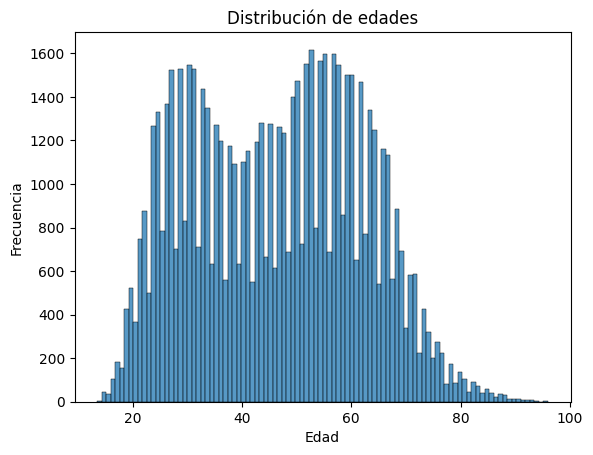

In [10]:
sns.histplot(df_demo["clnt_age"], bins=100)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de edades")
plt.show()

## Web data parte1

Marca cada paso en el proceso digital.

In [11]:
#Cantidad de duplicados
df_web1.duplicated().sum()

2095

In [ ]:
#borrando duplicados logicos
df_web1 = df_web1.drop_duplicates(
    subset=["visit_id", "process_step", "date_time"])

In [15]:
#Transformar date_time a su valor date-time
df_web1['date_time'] = pd.to_datetime(df_web1['date_time'])


## Web data parte 2

In [16]:
#Transformar date_time a su valor
df_web2['date_time'] = pd.to_datetime(df_web2['date_time'])

#revisando nulos 
df_web2.duplicated().sum()


8669

In [17]:
#borrando duplicados logicos
df_web2 = df_web2.drop_duplicates(
    subset=["visit_id", "process_step", "date_time"])

## Experiment Clients

Indica si un cliente fue parte del experimento.

In [91]:
df_exp_clients.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [92]:
df_exp_clients[df_exp_clients.isna().any(axis=1)]

,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [21]:
# Ver cuantas categorias hay y sus valores
df_exp_clients['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [23]:
#creando una categoria nueva para no eliminar los nulos
df_exp_clients.isna().sum() / df_exp_clients.shape[0] * 100 

client_id     0.000000
Variation    28.479372
dtype: float64

In [ ]:
# Creando una categoria No_Experiment
df_exp_clients["Variation"] = df_exp_clients["Variation"].fillna("No_Experiment")

In [25]:
df_exp_clients['Variation'].value_counts()

Variation
Test             26968
Control          23532
No_Experiment    20109
Name: count, dtype: int64

Se observó que una proporción considerable de clientes no presenta asignación experimental (valores nulos), lo que indica que estos no participaron en la prueba. Dichos registros se mantuvieron sin imputar y se excluyeron únicamente en los análisis específicos del experimento.

#### Quiénes son los principales clientes que utilizan este proceso en línea?

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [ ]:
# Definir "usar el proceso"
#active_client